# Sprint4 ロジステック回帰スクラッチ
---
推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1024]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, n_lambda, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.n_lambda = n_lambda  # 正則化パラメータ
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    
        # メイン処理
         # Xの第1成分を1として、引数のXと結合させる
        X = np.c_[np.ones(X.shape[0]),X]
        # thetaをゼロで初期化
        self.theta = np.zeros(X.shape[1])
        
        if X_val is not None:
            X_val = np.c_[np.ones(X_val.shape[0]),X_val]
    
        for i in range(self.iter):
            
            # 問題1（仮定関数の計算）
            y_hypothesis = self._linear_hypothesis(X)
            
            # 問題2（最急降下法によるパラメータの更新値計算）
            self._gradient_descent(X, y_hypothesis-y)
            
            # 問題7（学習曲線のプロット）のグラフ描画時（問題5（損失関数）で作成した関数を使用）
            # 損失値を保持
            self.loss[i] = self._loss_func(y_hypothesis, y)
            
            #### 検証データの欠損値を保持
            if X_val is not None:
                val_y_hyposhesis = self._linear_hypothesis(X_val)
                self.val_loss[i] = self._loss_func(val_y_hyposhesis, y_val)
                
                
                
    # 問題3
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        THRESHOLD = 0.5  # 閾値のデフォルトは0.5

        # 確率（predict_proba）の値に対し閾値でラベリング（0か1）を判定したものを返す
        y_pred = (self.predict_proba(X) > THRESHOLD).astype(int)
        
        return y_pred

    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        X = np.c_[np.ones(X.shape[0]),X]
        
        return self._linear_hypothesis(X)

    
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        y : 次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        # シグモイド関数を適用
        return 1 / (1 + np.exp(-self.theta @ X.T))
    
    
    # 問題2
    def _gradient_descent(self, X, error):
        """
        最急降下法を使って最適化する。正則化の処理も含む。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        error : 次の形のndarray, shape (n_samples, n_features)
          予測値と正解値の誤差(y_pred - y)
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          最急降下法を実施した結果
        """
        
        m, n = X.shape
        
        # 通常の線形回帰と同様にΘを更新
        self.theta = self.theta - ((error @ X)/m * self.lr)
        
        # 切片を除いた他のΘパラメータに対して正則化パラメータを適用する
        self.theta[1:] = self.theta[1:] - (self.lr*(self.n_lambda/m)*self.theta[1:])

    
    # 問題4 目的関数（損失関数）
    def _loss_func(self, y_hypothesis, y):
        """
        損失関数
        """
        
        calc1 = (-y*np.log(y_hypothesis) - (1-y)*np.log(1-y_hypothesis)).mean()
        # 正則化項
        calc2 = (self.theta[1:]**2).mean()*self.n_lambda/2
        
        return calc1 + calc2
    
    

## 【問題1】仮定関数
---
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。*シグモイド関数*は以下の式で表されます。
$$
g(z)=\frac{1 }{1+exp^{-z}} 
$$
線形回帰の仮定関数は次の式でした。
$$
hθ(x)=θT⋅x
$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$
hθ(x)=\frac{1 }{1+exp^{−θT⋅x}}
$$
x: 特徴量ベクトル

θ: パラメータ（重み）ベクトル

## 【問題2】最急降下法
---
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$
θ_j:=θ_j−α\frac{∂J(θ)}{∂θ_j}
$$
$$
\frac{∂J(θ)}{∂θ_0}=\frac{1}{m} \sum_{i=1}^{m}(h_θ(x^{(i)})−y^{(i)})x^{(i)}_j,j=0  
$$
$$
\frac{∂J(θ)}{∂θ_j}=(\frac{1}{m}\sum_{i=1}^{m}(h_θ(x^{(i)})−y^{(i)})x^{(i)}_j)+\frac{λ}{m}θ_j　,j≥1
$$
α : 学習率

i : サンプルのインデックス

j : 特徴量のインデックス

m : 入力されるデータの数

hθ() : 仮定関数

x : 特徴量ベクトル

θ : パラメータ（重み）ベクトル

x(i) : i番目のサンプルの特徴量ベクトル

y(i) : i番目のサンプルの正解ラベル

θj : j番目のパラメータ（重み）

λ : 正則化パラメータ

以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。切片であるθ0

が正則化項に含まれていないのは、切片を除いた、特徴量に対する係数を同じ視点で議論することができるようにするためです。

## 【問題3】推定
---
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 hθ(x)
の出力がpredict_probaの戻り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの戻り値となります。

## 【問題4】目的関数
---
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください。
$$
J(θ)=\frac{1}{m}[−y^{(i)}log(h_θ(x^{(i)}))−(1−y^{(i)})log(1−h_θ(x^{(i)}))]+\frac{λ}{2m}\sum_{j=1}^{n}θ^{2}_j
$$
m: 入力されるデータの数

hθ(): 仮定関数

x: 特徴量ベクトル

θ: パラメータ（重み）ベクトル

x(i): i番目のサンプルの特徴量ベクトル

y(i): i番目のサンプルの正解ラベル

θj: j番目のパラメータ（重み）

n: 特徴量の数

λ: 正則化パラメータ

## 【問題5】学習と推定
---
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [1025]:
def evaluate_performance_model(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data))
    
    # 混合行列
    print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_data, y_pred_data)))

In [1026]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
series = pd.DataFrame(iris.target, columns=['Species'])

df = pd.concat([df,series], axis=1)
# virgicolorとvirginicaの品種だけを使う
df_iris = df[df.Species != 0]
X = df_iris.drop(columns='Species').values
y = df_iris.Species
y =y.replace(1, 0)
y =y.replace(2, 1).values

>### scikit-learnによる実装

In [1027]:
#線形回帰モデル
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# model = LogisticRegression(C=0.01)
model = LogisticRegression()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
y_pred_proba = model.predict_proba(X_test_std)

print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)

# 指標値
evaluate_performance_model(y_test, y_pred)


Intercept: [-0.12156824]
Coefficients:  [[-0.18081033 -0.59829119  1.99399464  2.06969586]]
Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00
Confusion matrix:
[[15  0]
 [ 0 15]]


>### Scratch実装コード

In [1028]:
# クラスのインスタンス生成
num_iter = 1000   # イテレーション数（学習回数）
lr = 0.05  # 学習率
n_lambda = 0.01   # 正則化パラメータ
# theta = np.array([[0, 0]])
scratch_lr = ScratchLogisticRegression(num_iter, lr, n_lambda, None, None)

scratch_lr.fit(X_train_std, y_train, X_test_std, y_test)
s_y_pred = scratch_lr.predict(X_test_std)
s_y_pred_proba = scratch_lr.predict_proba(X_test_std)

print("Intercept:", scratch_lr.theta[0])
print("Coefficients: ", scratch_lr.theta[1:])

# 指標値
evaluate_performance_model(y_test, s_y_pred)


Intercept: -0.1328203219482884
Coefficients:  [-0.16491376 -0.77532391  2.33768737  2.58545133]
Accuracy: 	1.00
Precision: 	1.00
Recall: 	1.00
f1: 		1.00
Confusion matrix:
[[15  0]
 [ 0 15]]


## 【問題6】学習曲線のプロット
---
学習曲線を見て損失が適切に下がっているかどうか確認してください。

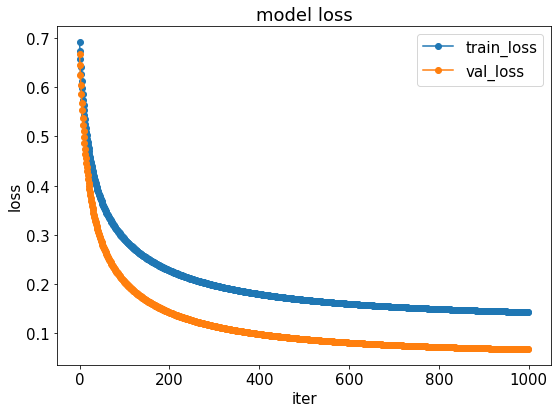

In [1029]:
# 損失値をプロット
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(8,6))

plt.title('model loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(range(scratch_lr.iter), scratch_lr.loss.T, linestyle='-', marker='o', label = 'train_loss')
plt.plot(range(scratch_lr.iter), scratch_lr.val_loss.T, linestyle='-', marker='o', label = 'val_loss')

plt.legend()
plt.tight_layout()
plt.show()

## 【問題7】決定領域の可視化
---
決定領域を可視化してください。

In [1030]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.01)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


In [1031]:
# データセット
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
series1 = pd.DataFrame(iris.target, columns=['Species'])
df = pd.concat([df,series1], axis=1)

X = df[df.Species != 0].iloc[:, [0,2]].values
y = df_iris.Species
y = y.replace(1, 0)
y = y.replace(2, 1).values


Accuracy: 	0.90
Precision: 	0.88
Recall: 	0.93
f1: 		0.90
Confusion matrix:
[[13  2]
 [ 1 14]]


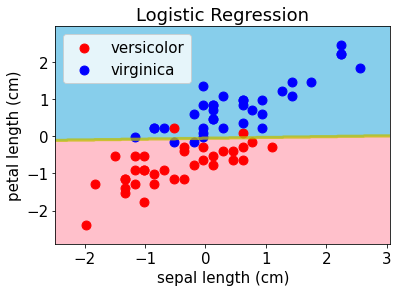

In [1032]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# クラスのインスタンス生成
num_iter = 1000   # イテレーション数（学習回数）
lr = 0.05  # 学習率
n_lambda = 0.01   # 正則化パラメータ
# theta = np.array([[0, 0]])
scratch_lr2 = ScratchLogisticRegression(num_iter, lr, n_lambda, None, None)

scratch_lr2.fit(X_train_std, y_train)
s_y_pred = scratch_lr2.predict(X_test_std)
s_y_pred_proba = scratch_lr2.predict_proba(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, s_y_pred)

#可視化: 訓練データ
decision_region(X_train_std, y_train, scratch_lr2, title='Logistic Regression', xlabel='sepal length (cm)', ylabel='petal length (cm)')


Accuracy: 	0.93
Precision: 	0.93
Recall: 	0.93
f1: 		0.93
Confusion matrix:
[[14  1]
 [ 1 14]]


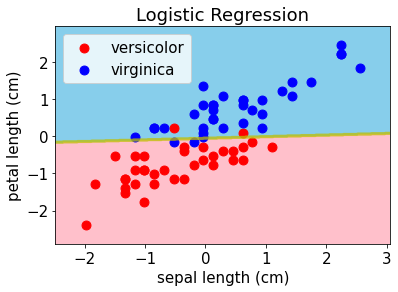

In [1033]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model2 = LogisticRegression()
model2.fit(X_train_std, y_train)
y_pred = model2.predict(X_test_std)
y_pred_proba = model2.predict_proba(X_test_std)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred)

#可視化: 訓練データ
decision_region(X_train_std, y_train, model2, title='Logistic Regression', xlabel='sepal length (cm)', ylabel='petal length (cm)')

